In [33]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 2060 (UUID: GPU-380040ef-0399-d9a4-9c93-391f6718fa1c)


In [34]:
import tensorflow as tf
tf.config.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [35]:
GPU_ID = "GPU-380040ef-0399-d9a4-9c93-391f6718fa1c"
IMG_SIZE = 200
BATCH_SIZE= 20

In [36]:
import os
import json
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2 as cv
from keras.preprocessing.image import ImageDataGenerator

In [37]:
os.environ["CUDA_VISIBLE_DEVICES"] = GPU_ID

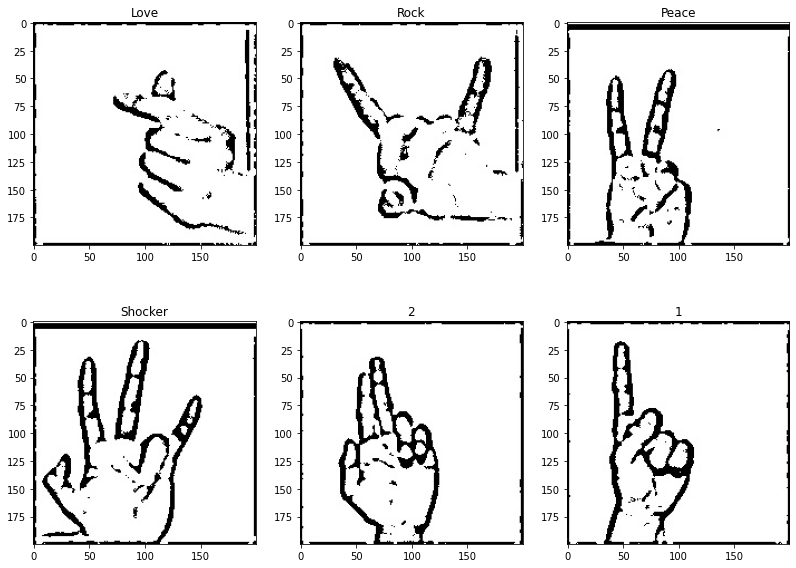

In [38]:
with open('config.json','r')as f:
    x=json.load(f)['gesture']

a=[random.randint(0,22) for i in range(6)]
b=random.randint(0,815)
figure, axis = plt.subplots(2, 3,figsize=(15,15))
k=0
for i in range(2):
    for j in range(3):
        frame = cv.imread(os.path.join('..','dataset','train',str(a[k]),str(b)+'.jpg'))
        axis[i,j].imshow(frame)
        axis[i,j].set_title(x[str(a[k])])
        k+=1
plt.subplots_adjust(left=0.2,
                    bottom=0.01, 
                    right=0.9, 
                    top=0.5, 
                    wspace=0.2, 
                    hspace=0.3)
plt.show()


In [40]:
img_gen_train = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.15,
                             shear_range=0.15,
                             horizontal_flip=True)

In [41]:
img_gen_test = ImageDataGenerator(rescale=1./255)

In [42]:
train_data = img_gen_train.flow_from_directory('../dataset/train',
                                                 target_size=(IMG_SIZE, IMG_SIZE),
                                                 batch_size=16,
                                                 color_mode='grayscale',
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 18768 images belonging to 23 classes.


In [43]:
test_data = img_gen_test.flow_from_directory('../dataset/test',
                                            target_size=(IMG_SIZE , IMG_SIZE),
                                            batch_size=16,
                                            color_mode='grayscale',
                                            class_mode='categorical',
                                            shuffle=True) 

Found 4692 images belonging to 23 classes.


In [44]:
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense , Dropout

In [45]:
classifier = Sequential()

In [46]:
classifier.add(Convolution2D(32, (3, 3), input_shape=(IMG_SIZE , IMG_SIZE,1), activation='relu'))

In [47]:
classifier.add(MaxPooling2D(pool_size=(2, 2)))

In [48]:
classifier.add(Convolution2D(32, (3, 3), activation='relu'))


In [49]:
classifier.add(MaxPooling2D(pool_size=(2, 2)))

In [50]:

classifier.add(Flatten())


In [51]:

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))


In [52]:
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dropout(0.40))


In [53]:
classifier.add(Dense(units=32, activation='relu'))

In [54]:

classifier.add(Dense(units=23, activation='softmax'))


In [55]:

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2

In [56]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               9437312   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [57]:
classifier.fit_generator(
        train_data,
        epochs=5,
        validation_data=test_data)

D:\Anaconda\envs\project\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1173/1173 [==============================] - 102s 86ms/step - loss: 2.0817 - accuracy: 0.3639 - val_loss: 0.3744 - val_accuracy: 0.9182
Epoch 2/5
1173/1173 [==============================] - 58s 50ms/step - loss: 0.8029 - accuracy: 0.7383 - val_loss: 0.0772 - val_accuracy: 0.9821
Epoch 3/5
1173/1173 [==============================] - 54s 46ms/step - loss: 0.4512 - accuracy: 0.8553 - val_loss: 0.0153 - val_accuracy: 0.9994
Epoch 4/5
1173/1173 [==============================] - 50s 43ms/step - loss: 0.3289 - accuracy: 0.8946 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 5/5
1173/1173 [==============================] - 46s 39ms/step - loss: 0.2526 - accuracy: 0.9200 - val_loss: 0.0022 - val_accuracy: 1.0000


In [58]:
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
classifier.save_weights("model_weights.h5")
print('Saved model to disk')

Saved model to disk
